#### Import of Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [41]:
df = pd.read_csv('datasets/marketing/marketing.csv')
#df_cd = pd.merge(df["at1"],df["height"], how='inner',left_on=None)
#df=df.drop(columns=["at1"])
#df=df.dropna(axis=0, how="any")
df=df.head(900)
df = df[df != "?"]
df=df.dropna(axis=0, how="any")
df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)


In [42]:
df.head(5)

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatu,TypeOfHome,EthnicClass,Language,Income
1,1.0,1.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,1.0,1.0,7.0,1.0,9.0
2,2.0,1.0,3.0,5.0,1.0,5.0,2.0,3.0,1.0,2.0,3.0,7.0,1.0,9.0
3,2.0,5.0,1.0,2.0,6.0,5.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
4,2.0,5.0,1.0,2.0,6.0,3.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
5,1.0,1.0,6.0,4.0,8.0,5.0,3.0,2.0,0.0,1.0,1.0,7.0,1.0,8.0


In [43]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1 to 899
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               628 non-null    float64
 1   MaritalStatus     628 non-null    float64
 2   Age               628 non-null    float64
 3   Education         628 non-null    float64
 4   Occupation        628 non-null    float64
 5   YearsInSf         628 non-null    float64
 6   DualIncome        628 non-null    float64
 7   HouseholdMembers  628 non-null    float64
 8   Under18           628 non-null    float64
 9   HouseholdStatu    628 non-null    float64
 10  TypeOfHome        628 non-null    float64
 11  EthnicClass       628 non-null    float64
 12  Language          628 non-null    float64
 13  Income            628 non-null    float64
dtypes: float64(14)
memory usage: 73.6 KB
Number of duplicated rows is:  19
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

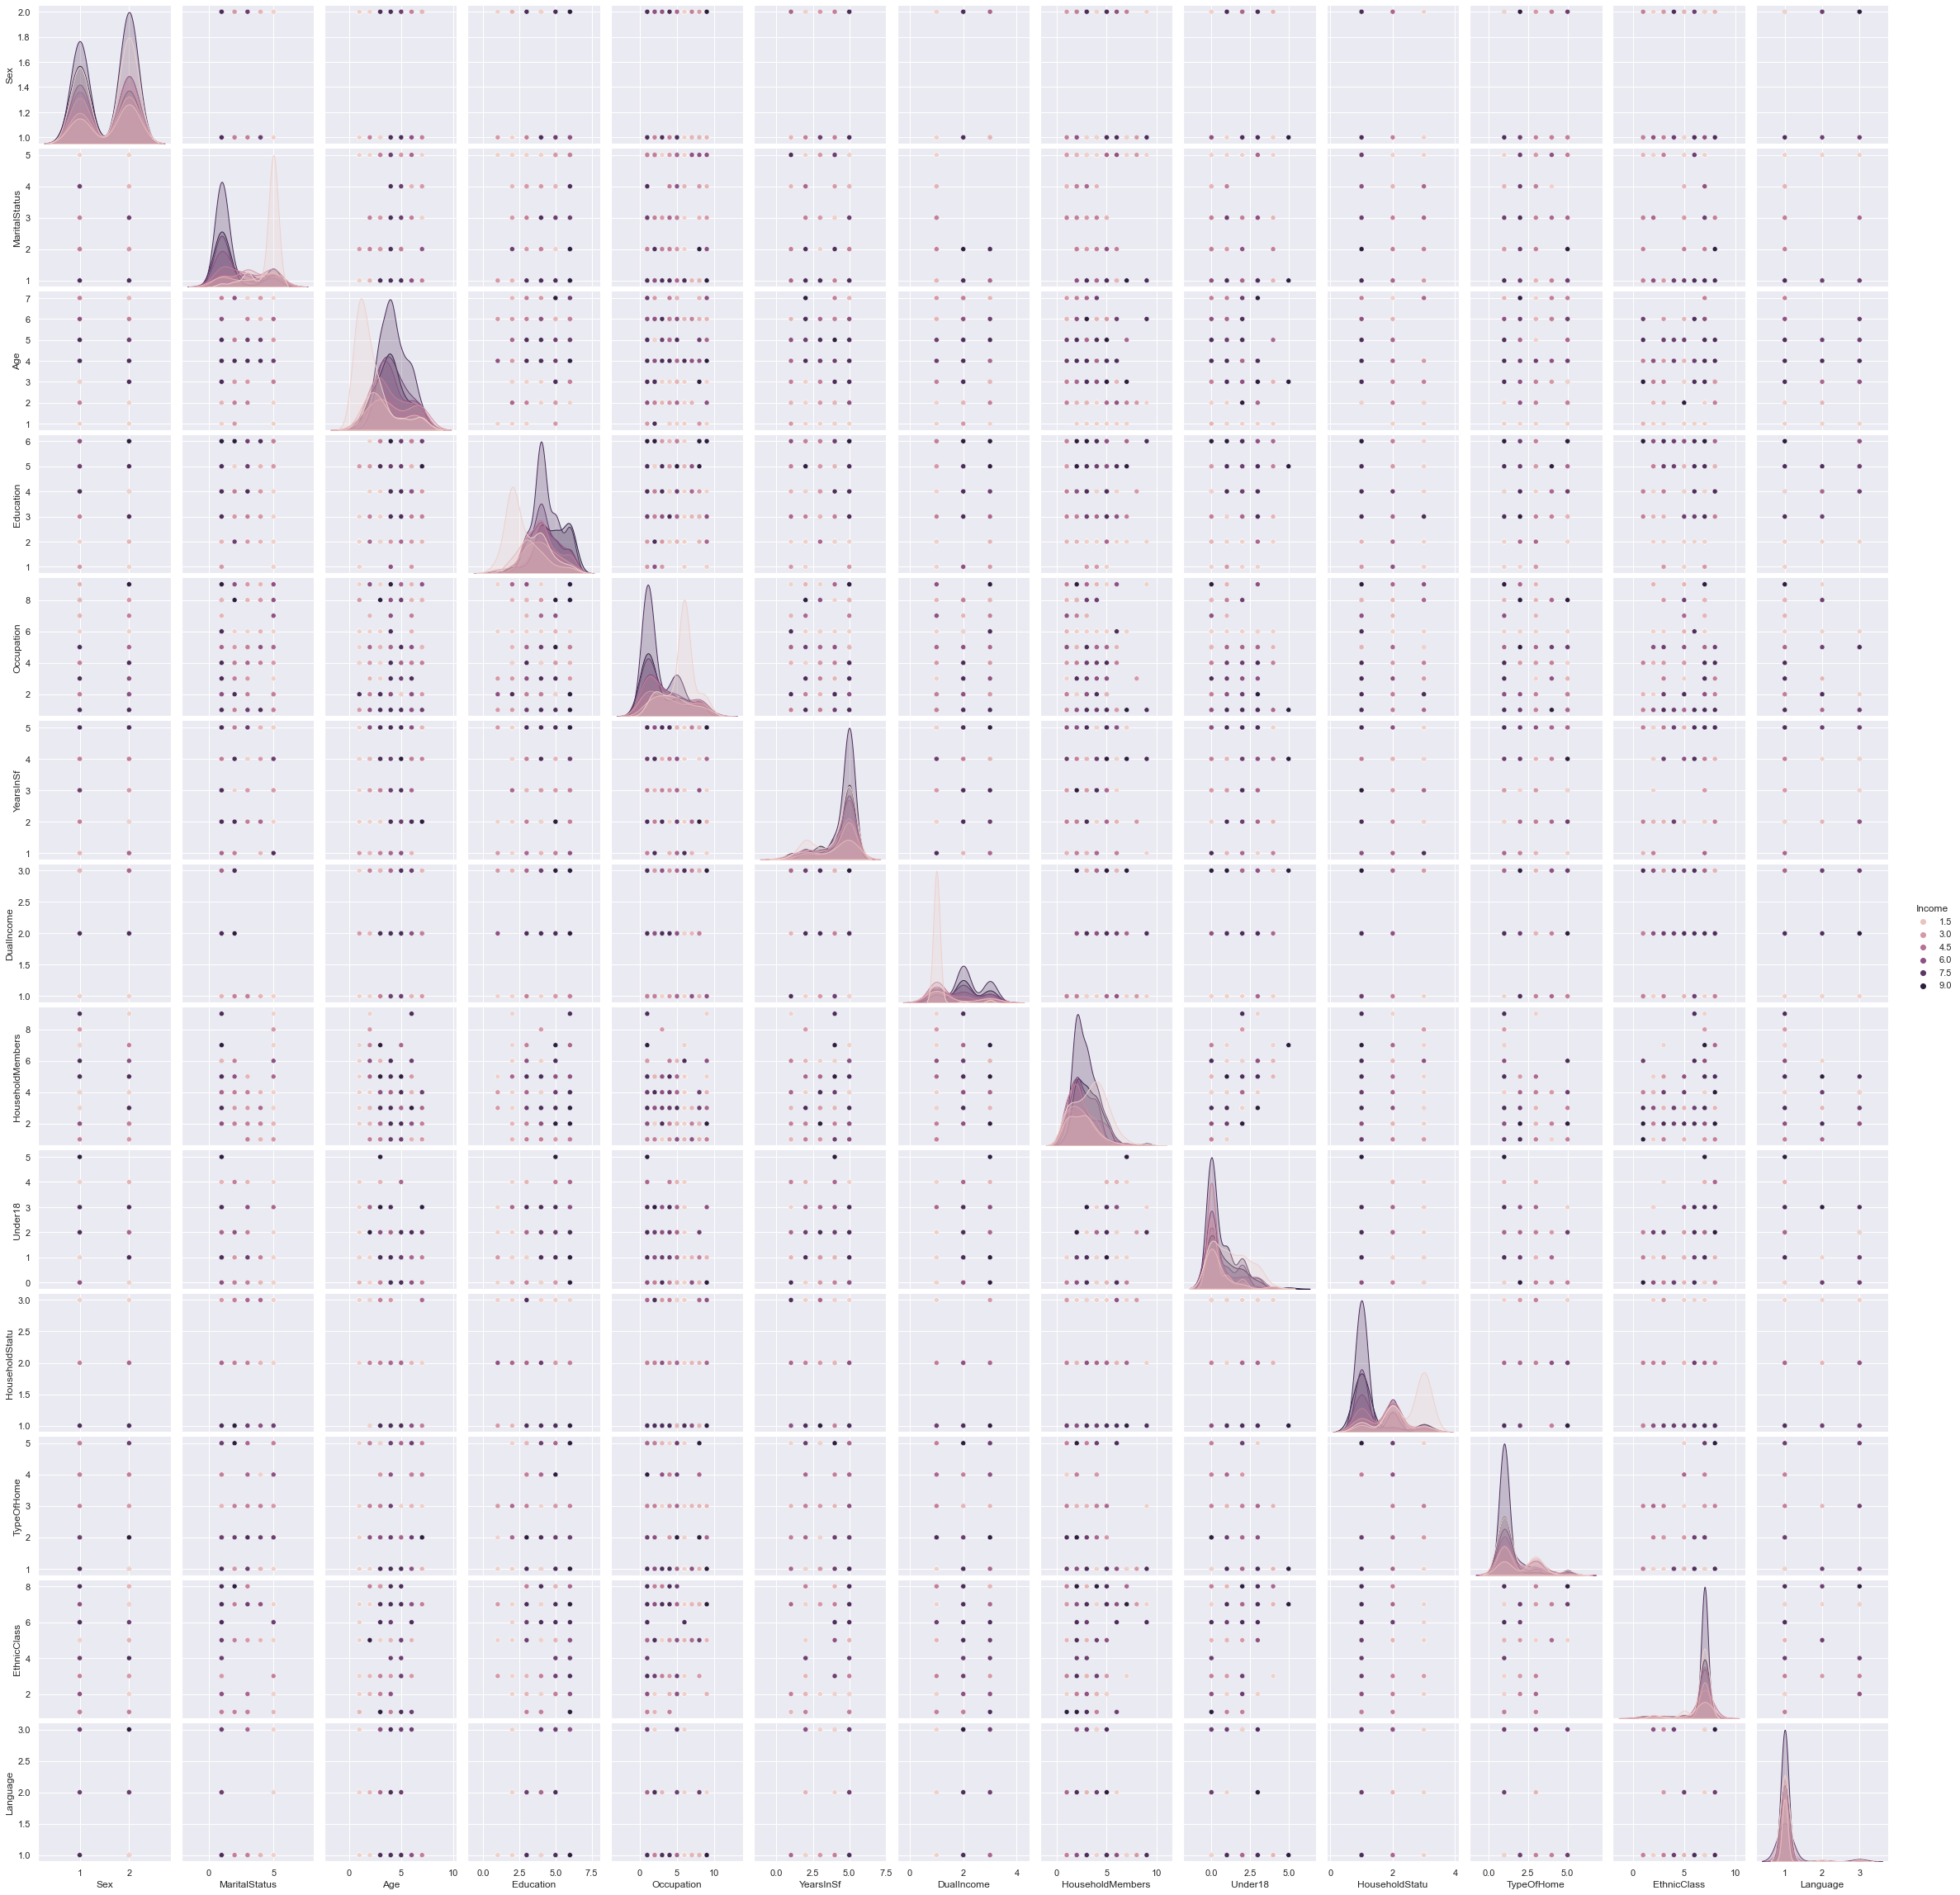

In [44]:
sns.pairplot(df, hue='Income')
plt.show()

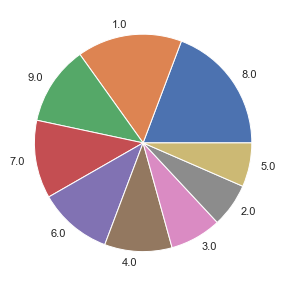

In [45]:
y =df['Income']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [46]:
X = df.drop(columns=['Income'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,628.0,1.544586,0.498405,1.0,1.0,2.0,2.0,2.0
MaritalStatus,628.0,2.641720,1.776323,1.0,1.0,2.0,5.0,5.0
Age,628.0,3.805732,1.757327,1.0,3.0,4.0,5.0,7.0
Education,628.0,4.019108,1.217739,1.0,3.0,4.0,5.0,6.0
Occupation,628.0,3.635350,2.651320,1.0,1.0,3.0,6.0,9.0
YearsInSf,628.0,4.313694,1.152767,1.0,4.0,5.0,5.0,5.0
DualIncome,628.0,1.705414,0.795223,1.0,1.0,1.0,2.0,3.0
HouseholdMembers,628.0,2.785032,1.388021,1.0,2.0,3.0,4.0,9.0
Under18,628.0,0.673567,1.004044,0.0,0.0,0.0,1.0,5.0
HouseholdStatu,628.0,1.652866,0.741055,1.0,1.0,1.0,2.0,3.0


#### Standardize the Data

In [47]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,628.0,5.374328e-17,1.000797,-1.093528,-1.093528,0.914471,0.914471,0.914471
MaritalStatus,628.0,6.788625e-17,1.000797,-0.924961,-0.924961,-0.361551,1.328678,1.328678
Age,628.0,2.828594e-18,1.000797,-1.597864,-0.458864,0.110635,0.680135,1.819135
Education,628.0,1.647656e-16,1.000797,-2.481250,-0.837553,-0.015704,0.806145,1.627993
Occupation,628.0,3.111453e-17,1.000797,-0.994769,-0.994769,-0.239826,0.892587,2.025001
YearsInSf,628.0,-3.903459e-16,1.000797,-2.876849,-0.272340,0.595830,0.595830,0.595830
DualIncome,628.0,-3.960031e-17,1.000797,-0.887772,-0.887772,-0.887772,0.370740,1.629252
HouseholdMembers,628.0,7.354344e-17,1.000797,-1.287052,-0.566027,0.154997,0.876022,4.481145
Under18,628.0,-8.485781e-18,1.000797,-0.671389,-0.671389,-0.671389,0.325378,4.312443
HouseholdStatu,628.0,5.232898e-17,1.000797,-0.881698,-0.881698,-0.881698,0.468805,1.819309


#### Observations and Variables

In [48]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

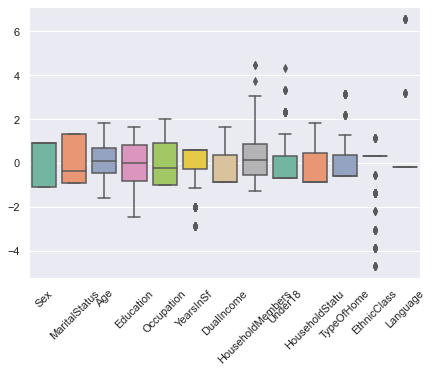

In [49]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

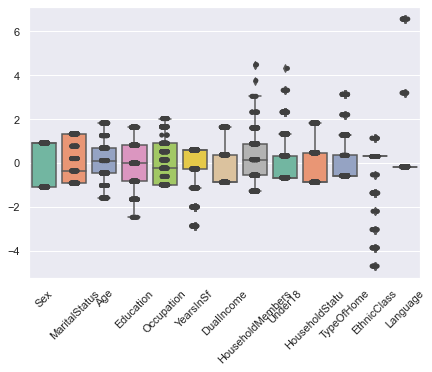

In [50]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

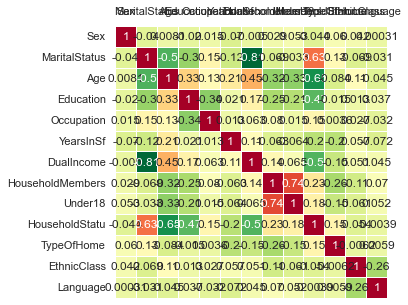

In [51]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [52]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [53]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.635156,2.493925,-0.486732,-0.458582,0.371365,-1.034713,-0.055802,-0.030307,1.092445,0.206372,0.057389
1,-0.384149,0.134242,0.735247,-0.276650,-1.394039,0.221846,-1.556344,0.213258,0.168031,0.788344,0.317538
2,3.362819,1.123062,-1.341928,-0.172370,-0.071077,1.127446,-0.241398,0.337390,-0.102706,0.293021,-0.178583
3,3.638182,1.072352,-0.810106,0.382185,-0.779651,0.448925,0.854654,0.102028,-0.358054,0.046001,-0.187693
4,-2.290459,0.230491,-1.635582,0.799648,1.225113,-0.905263,0.345021,0.009284,-0.024870,0.410129,-0.301036
...,...,...,...,...,...,...,...,...,...,...,...
623,-2.014742,-0.342621,-0.148834,-0.925078,0.707259,-0.535757,-0.078811,0.167607,-0.711586,-0.736196,0.394519
624,-1.201753,0.734620,0.557529,-1.022198,-0.816779,0.924822,-0.262835,0.082514,-0.153955,0.320976,-0.536772
625,-0.219205,2.949276,-0.655839,-0.171436,-0.760079,0.774876,-0.501006,-0.000472,0.399878,-1.032696,-0.383934
626,-0.633994,2.625062,-0.123980,-1.777937,-0.414026,-0.884368,-0.465234,0.709175,0.671356,-1.126780,-0.134277


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'11 Principal Components explain [98.84%] of the variance'}, xlabel='PC1 (24.3% expl.var)', ylabel='PC2 (15.7% expl.var)'>)

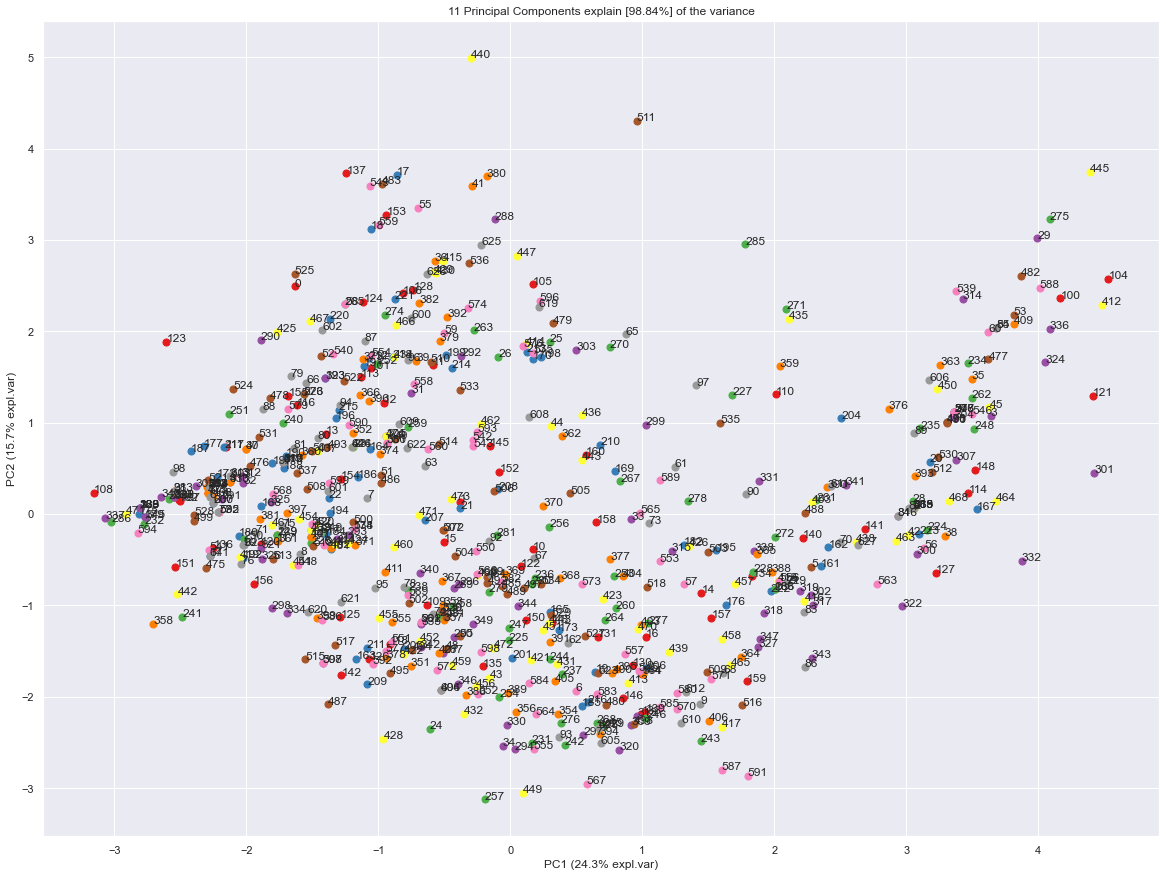

In [54]:
model.scatter(label=True, legend=False)

Eigenvectors

In [55]:
A = out['loadings'].T

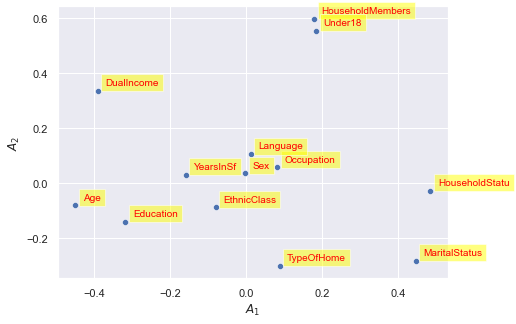

In [56]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

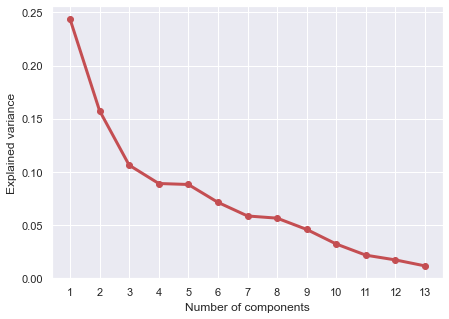

In [57]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

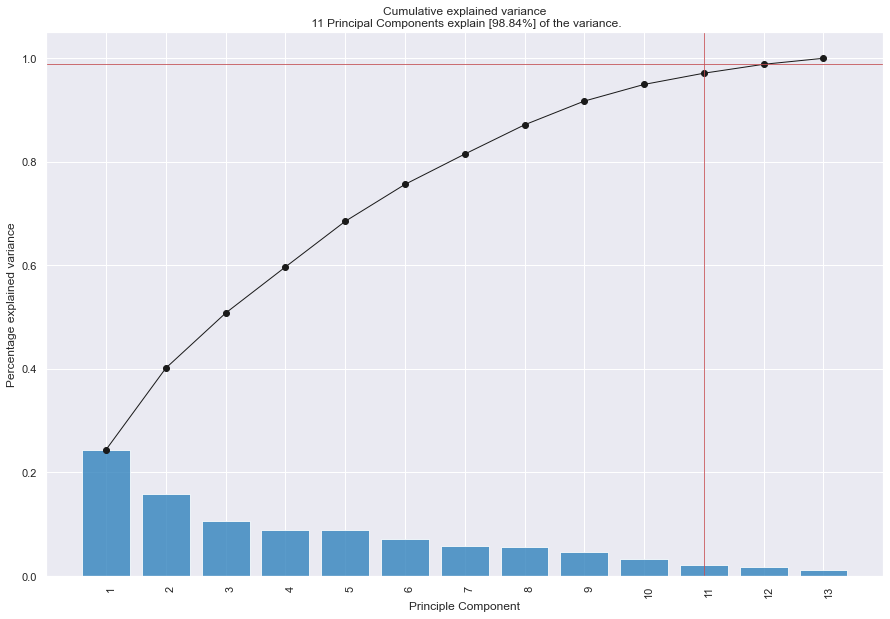

<Figure size 504x360 with 0 Axes>

In [58]:
model.plot();